In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/Users/seanbunk/Desktop/video_game.zip")
df.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
df.shape

(16598, 11)

In [10]:
df.isnull().sum().sort_values()
# missing 58 values for Publisher, and 271 values for Year

Rank              0
Name              0
Platform          0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
Publisher        58
Year            271
dtype: int64

In [11]:
nan_df = df[df.isna().any(axis = 1)]
nan_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [12]:
df = df.dropna()
df.isnull().sum().sort_values()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
df.Year.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000., 1995., 2016., 1991., 1981., 1987., 1980.,
       1983., 2020., 2017.])

In [14]:
#Which gaming system had the highest sales price?
platform_1 = df.Platform.unique()
platform_count = df.Platform.nunique()

print(platform_1)
platform_count

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


31

In [39]:
plat_sales = df.groupby('Platform').sum()[['Global_Sales']].sort_values('Global_Sales', ascending = False)
plat_sales.head(5)

,Global_Sales
Platform,
PS2,1233.46
X360,969.60
PS3,949.35
Wii,909.81
DS,818.91


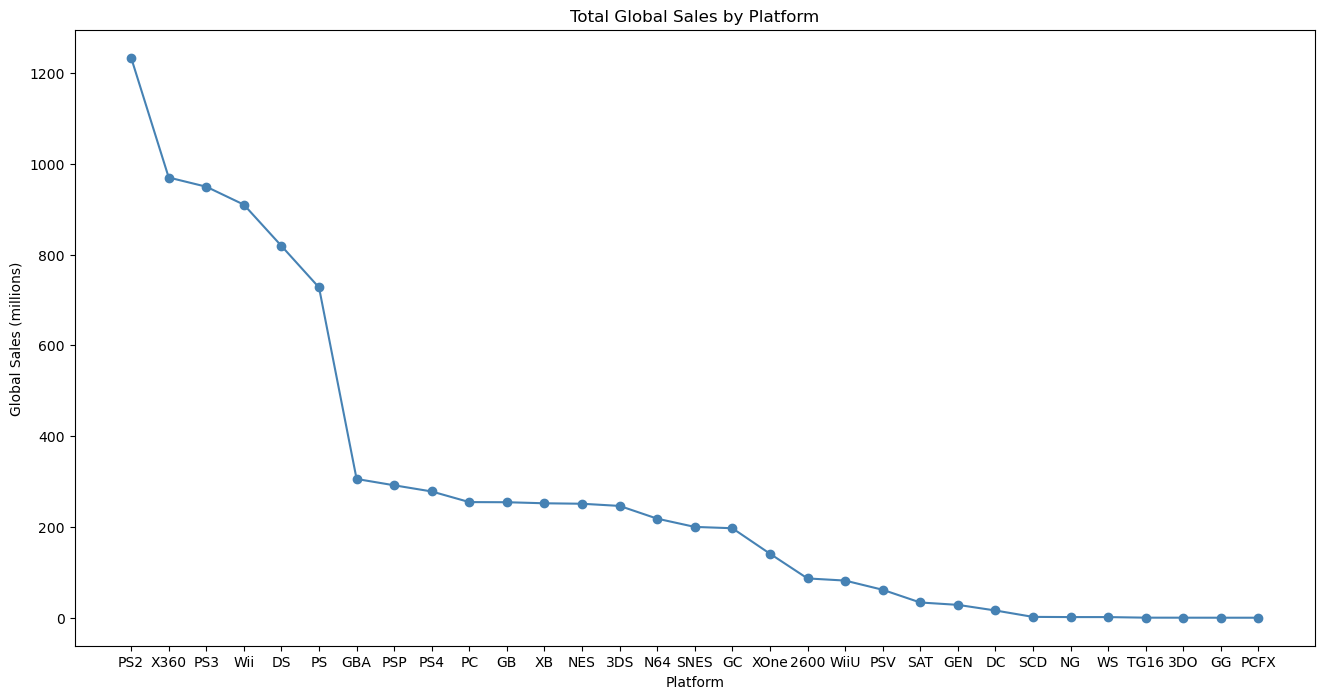

In [16]:
ig, ax = plt.subplots(figsize=(16, 8))
ax.plot(plat_sales.index, plat_sales['Global_Sales'], color='steelblue', marker='o')
ax.set_xlabel('Platform')
ax.set_ylabel('Global Sales (millions)')
ax.set_title('Total Global Sales by Platform')
plt.show()

# PS2 had the highest

In [17]:
# Top genre of game that made most money.
df.groupby('Genre').sum().sort_values(by = 'Genre',ascending = True)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,25955792,6527703.0,861.77,516.48,158.65,184.92,1722.84
Adventure,14704318,2558355.0,101.93,63.74,51.99,16.70,234.59
Fighting,6371780,1675871.0,220.74,100.00,87.15,36.19,444.05
Misc,14445141,3384308.0,396.92,211.77,106.67,73.92,789.87
Platform,6019939,1753335.0,445.99,200.65,130.65,51.51,829.13
Puzzle,5496785,1142980.0,122.01,50.52,56.68,12.47,242.21
Racing,9699328,2455923.0,356.93,236.31,56.61,76.68,726.76
Role-Playing,11840252,2950365.0,326.50,187.57,350.29,59.38,923.83
Shooter,9399409,2571588.0,575.16,310.45,38.18,101.90,1026.20


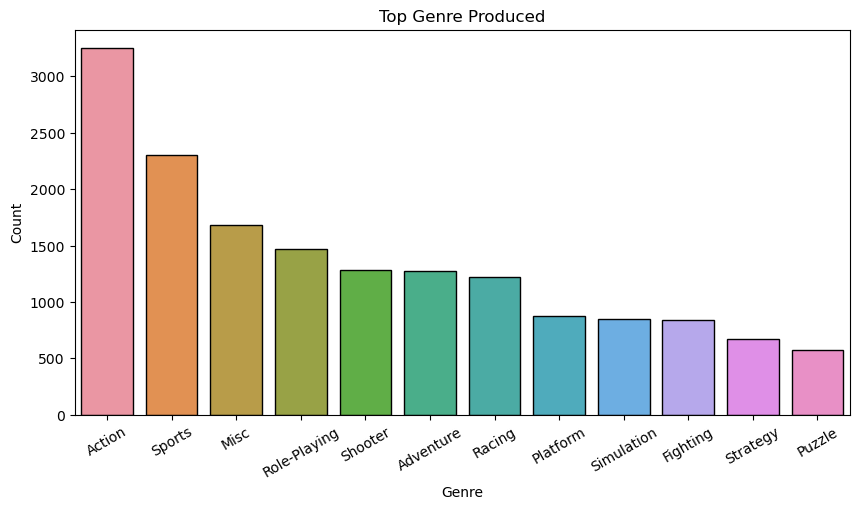

In [18]:
plt.figure(figsize= (10,5))
plt.xticks(size = 10, rotation = 30)
plt.yticks(size = 10)
sns.countplot(x = 'Genre', data = df, order = df['Genre'].value_counts().index, ec = 'Black',lw = 1)
plt.title("Top Genre Produced")
plt.xlabel('Genre', size = 10)
plt.ylabel('Count', size = 10)
plt.show()


In [19]:
# Action games were the highest genre produced

sales_by_genre = df.groupby('Genre').sum().sort_values('Global_Sales', ascending = False)

the_genre = [genre for genre, df in df.groupby('Genre')]

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

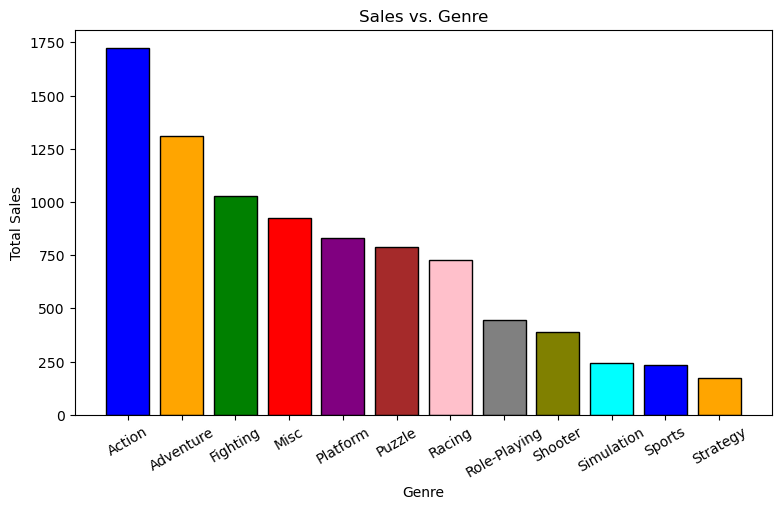

In [20]:
plt.figure(figsize = (9,5))
plt.bar(the_genre, sales_by_genre['Global_Sales'], ec = 'Black', lw = 1, color = colors)
plt.title("Sales vs. Genre")
plt.xticks(the_genre, size = 10, rotation = 30)
plt.ylabel('Total Sales')
plt.xlabel('Genre')
plt.show()

#Action, adventure, and fighting were the top 3 genres sold

In [21]:
# change Year into an int
df['Year'] = df['Year'].astype(int)
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [40]:
# video game global sales by year
sales_by_year = df.groupby('Year').sum()['Global_Sales'].reset_index()
sales_by_year.tail()

,Year,Global_Sales
34,2014,337.03
35,2015,264.44
36,2016,70.90
37,2017,0.05
38,2020,0.29


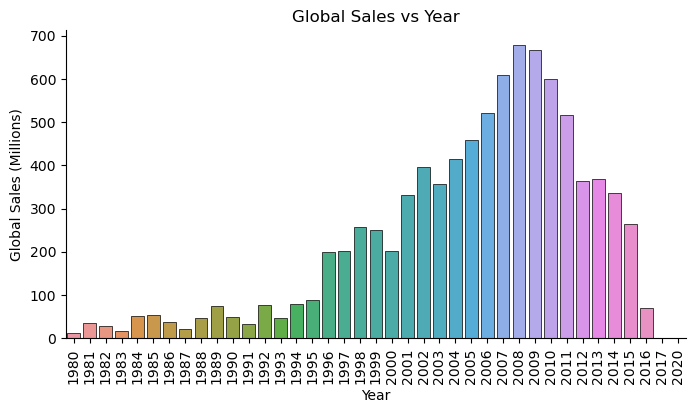

In [23]:
plt.figure(figsize = (8,4))
sns.barplot(data = sales_by_year, x = 'Year', y = 'Global_Sales', ec = 'Black', lw = 0.5)
plt.xticks(rotation = 90, size = 10)
plt.title('Global Sales vs Year')
plt.xlabel('Year', size = 10)
plt.ylabel('Global Sales (Millions)', size = 10)
sns.despine()
plt.show()
# 2008 had the highest sales out of all the years at almost 700 million

In [24]:
# Which year had the most game releases?  2009

ordered_year = df.groupby(by = ['Year'])['Name'].count().sort_values(ascending = False).index
ordered_year

Int64Index([2009, 2008, 2010, 2007, 2011, 2006, 2005, 2002, 2003, 2004, 2012,
            2015, 2014, 2013, 2001, 1998, 2000, 2016, 1999, 1997, 1996, 1995,
            1994, 1993, 1981, 1992, 1991, 1982, 1986, 1989, 1983, 1987, 1990,
            1988, 1985, 1984, 1980, 2017, 2020],
           dtype='int64', name='Year')

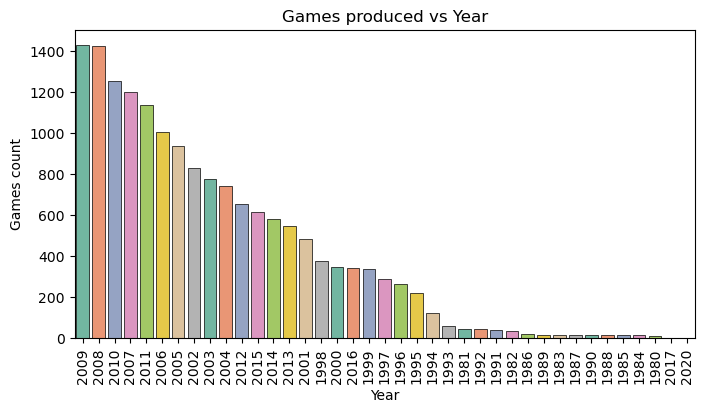

In [25]:
plt.figure(figsize = (8,4))
sns.countplot(data = df, x = 'Year', palette = 'Set2', order = ordered_year, ec = 'Black', lw = 0.5)
plt.xticks(rotation = 90)
plt.title('Games produced vs Year')
plt.xlabel('Year', size = 10)
plt.ylabel('Games count', size= 10)
plt.show()

In [26]:
# Which region had most sales?  North America

sales_region = df[['NA_Sales', "EU_Sales", 'JP_Sales', 'Other_Sales']]
sales_region = sales_region.sum().reset_index().rename(columns = {'index':'region', 0:'sale'})
sales_region

,region,sale
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


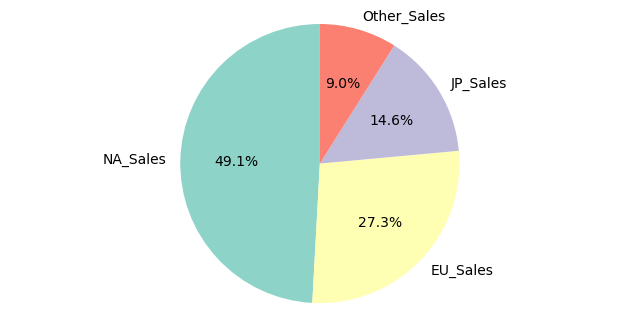

In [27]:
plt.figure(figsize = (8,4))
sns.barplot(data = sales_region, x ='region', y = 'sale', palette = 'Set3')
plt.title('Sales by Region')

plt.clf()
plt.pie(sales_region['sale'], labels= sales_region['region'],autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.axis('equal')
plt.show()

In [28]:
# which genre had the highest sales by region?

genre_compare = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
genre_map = genre_compare.groupby('Genre').sum()
genre_map

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861.77,516.48,158.65,184.92
Adventure,101.93,63.74,51.99,16.70
Fighting,220.74,100.00,87.15,36.19
Misc,396.92,211.77,106.67,73.92
Platform,445.99,200.65,130.65,51.51
Puzzle,122.01,50.52,56.68,12.47
Racing,356.93,236.31,56.61,76.68
Role-Playing,326.50,187.57,350.29,59.38
Shooter,575.16,310.45,38.18,101.90


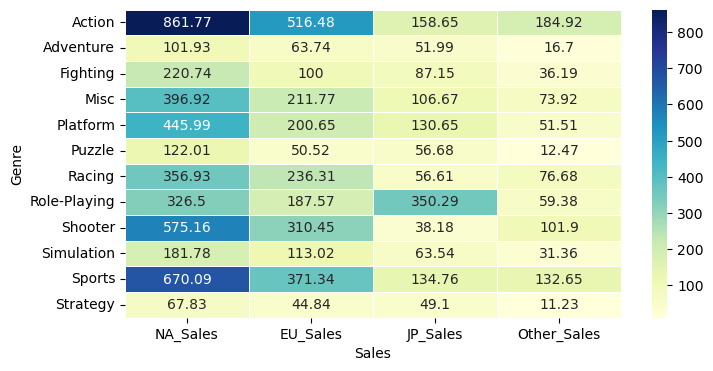

In [29]:
plt.figure(figsize = (8,4))
sns.heatmap(genre_map, annot = True, fmt = '.5g', lw = .5, cmap='YlGnBu')
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Sales')
plt.ylabel('Genre')
plt.show()


In [30]:
#North america has the highest sales compared to the other regions. Both EU and North America have 
# Action games as the most popular genre, and JPN has role playing games as the most popular

In [31]:
# what are the top publishers?

top_pub = df[['Publisher']].value_counts().reset_index()[:10]
top_pub.columns = ['Publisher', 'Count']
top_pub

,Publisher,Count
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
5,THQ,712
6,Nintendo,696
7,Sony Computer Entertainment,682
8,Sega,632
9,Take-Two Interactive,412


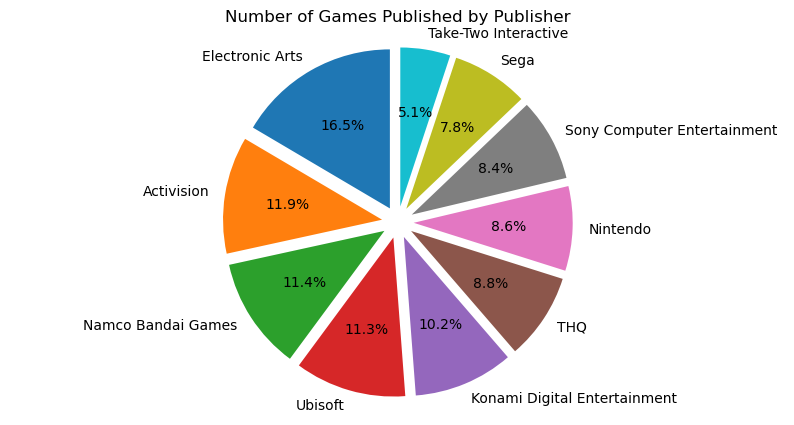

In [32]:
plt.figure(figsize = (10,5))
plt.title('Number of Games Published by Publisher')
plt.pie(top_pub['Count'], labels=top_pub['Publisher'],autopct='%1.1f%%', startangle=90, explode=[0.1]*len(top_pub))
plt.axis('equal')
plt.show()
# EA has the most games published

In [33]:
#Which game has the highest sale price globally?
top_game = df.head(10)
top_game = top_game[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game = top_game.sort_values(by = ['Global_Sales'], ascending = False)
top_game

y_arr = np.arange(0,10)

In [34]:
name = top_game['Name']
year = top_game['Year']

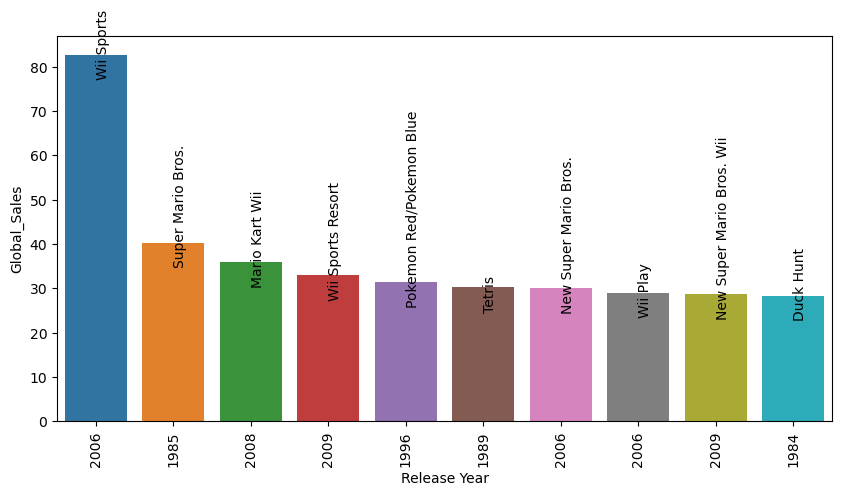

In [38]:
plt.figure(figsize = (10,5))
graph = sns.barplot(x = 'Name', y = 'Global_Sales', data = top_game)
index = 0
for value in top_game['Global_Sales']:
    graph.text(index, value - 5, name[index], size = 10, rotation = 90)
    index += 1
    
plt.xticks(y_arr, top_game['Year'], rotation = 90)
plt.xlabel('Release Year')
plt.show()

In [36]:
# wii sports